In [24]:
import pandas as pd

# File paths (adjust if your file paths differ)
news_file = '../MINDsmall_train/news.tsv'
behaviors_train_file = '../MINDsmall_train/behaviors.tsv'
behaviors_dev_file = '../MINDsmall_dev/behaviors.tsv'
# Define column names for each file
news_cols = ['news_id', 'category', 'subcategory', 'title',
             'abstract', 'url', 'title_entities', 'abstract_entities']
behaviors_train_cols = ['impression_id', 'user_id', 'time', 'history', 'impressions']
behaviors_dev_cols = ['impression_id', 'user_id', 'time', 'history', 'impressions']
# Load news data and print head
news_df = pd.read_csv(news_file, sep='\t', header=None, names=news_cols)
print("News DataFrame Head:")
print(news_df.head(), "\n")

# Load behaviors data and print head
behaviors_train_df = pd.read_csv(behaviors_train_file, sep='\t', header=None, names=behaviors_train_cols)
behaviors_dev_df = pd.read_csv(behaviors_dev_file, sep='\t', header=None, names=behaviors_dev_cols)
print("Behaviors DataFrame Head:")
print(behaviors_train_df.head(), "\n")


News DataFrame Head:
  news_id   category      subcategory  \
0  N55528  lifestyle  lifestyleroyals   
1  N19639     health       weightloss   
2  N61837       news        newsworld   
3  N53526     health           voices   
4  N38324     health          medical   

                                               title  \
0  The Brands Queen Elizabeth, Prince Charles, an...   
1                      50 Worst Habits For Belly Fat   
2  The Cost of Trump's Aid Freeze in the Trenches...   
3  I Was An NBA Wife. Here's How It Affected My M...   
4  How to Get Rid of Skin Tags, According to a De...   

                                            abstract  \
0  Shop the notebooks, jackets, and more that the...   
1  These seemingly harmless habits are holding yo...   
2  Lt. Ivan Molchanets peeked over a parapet of s...   
3  I felt like I was a fraud, and being an NBA wi...   
4  They seem harmless, but there's a very good re...   

                                             url  \
0  htt

In [25]:
# Count unique users in train and dev sets
unique_train_users = behaviors_train_df['user_id'].nunique()
unique_dev_users = behaviors_dev_df['user_id'].nunique()

print(f"Number of unique users in training set: {unique_train_users}")
print(f"Number of unique users in development set: {unique_dev_users}")


Number of unique users in training set: 50000
Number of unique users in development set: 50000


In [26]:
import numpy as np

embedding_file = '../MINDsmall_train/entity_embedding.vec'

# Load entity embeddings
def load_embeddings(embedding_file):
    embeddings = {}
    with open(embedding_file, 'r', encoding='utf-8') as f:
        for i, line in enumerate(f):
            # Split on whitespace
            parts = line.strip().split()
            
            # The first token is the entity ID, the rest are the vector values
            entity = parts[0]
            vector = np.array([float(x) for x in parts[1:]], dtype=np.float32)
            embeddings[entity] = vector
            
            # For debugging, just print the first few lines, then stop
            if i < 5:  # print the first 5 lines
                print(f"Line {i}:")
                print(f"  Entity: {entity}")
                print(f"  Vector (length={len(vector)}): {vector}\n")
    
    # Print total embeddings loaded
    print(f"Total embeddings loaded: {len(embeddings)}")
    
    return embeddings

# Actually load and print a sample
embeddings = load_embeddings(embedding_file)


Line 0:
  Entity: Q41
  Vector (length=100): [-0.063388 -0.181451  0.057501 -0.091254 -0.076217 -0.052525  0.0505
 -0.224871 -0.018145  0.030722  0.064276  0.073063  0.039489  0.159404
 -0.128784  0.016325  0.026797  0.13709   0.001849 -0.059103  0.012091
  0.045418  0.000591  0.211337 -0.034093 -0.074582  0.014004 -0.099355
  0.170144  0.109376 -0.014797  0.071172  0.080375  0.045563 -0.046462
  0.070108  0.015413 -0.020874 -0.170324 -0.00113   0.05981   0.054342
  0.027358 -0.028995 -0.224508  0.066281 -0.200006  0.018186  0.082396
  0.167178 -0.136239  0.055134 -0.080195 -0.00146   0.031078 -0.017084
 -0.091176 -0.036916  0.124642 -0.098185 -0.054836  0.152483 -0.053712
  0.092816 -0.112044 -0.072247 -0.114896 -0.036541 -0.186339 -0.16061
  0.037342 -0.133474  0.11008   0.070678 -0.005586 -0.046667 -0.07201
  0.086424  0.026165  0.030561  0.077888 -0.117226  0.211597  0.112512
  0.079999 -0.083398 -0.121117  0.071751 -0.017654 -0.134979 -0.051949
  0.001861  0.124535 -0.151043 -0.26

In [27]:
import json

def parse_entity_list(entity_col):
    """
    Parses the JSON in the entity columns to extract a list of Wikidata IDs.
    """
    try:
        data = json.loads(entity_col)  # convert string to Python list/dict
        # Extract 'WikidataId' from each object if present
        wikidata_ids = [obj['WikidataId'] for obj in data if 'WikidataId' in obj]
        return wikidata_ids
    except (json.JSONDecodeError, TypeError):
        # Return empty list if parsing fails
        return []

# Create a new column with parsed Wikidata IDs
news_df['title_entity_ids'] = news_df['title_entities'].apply(parse_entity_list)

# Optional: do the same for abstract_entities
news_df['abstract_entity_ids'] = news_df['abstract_entities'].apply(parse_entity_list)

# Quick check
print("Parsed entity IDs (head):")
print(news_df[['title_entities', 'title_entity_ids']].head())





print(news_df['title_entity_ids'].head())



Parsed entity IDs (head):
                                      title_entities         title_entity_ids
0  [{"Label": "Prince Philip, Duke of Edinburgh",...  [Q80976, Q43274, Q9682]
1  [{"Label": "Adipose tissue", "Type": "C", "Wik...                [Q193583]
2                                                 []                       []
3                                                 []                       []
4  [{"Label": "Skin tag", "Type": "C", "WikidataI...               [Q3179593]
0    [Q80976, Q43274, Q9682]
1                  [Q193583]
2                         []
3                         []
4                 [Q3179593]
Name: title_entity_ids, dtype: object


In [28]:

article_vectors = {}

for idx, row in news_df.iterrows():
    # idx is the news_id from set_index('news_id'), row is the row data
    entity_ids = row['title_entity_ids']  # or combine with abstract_entity_ids if you want
    
    # Collect all entity embeddings that exist
    valid_embeddings = []
    for eid in entity_ids:
        if eid in embeddings:
            valid_embeddings.append(embeddings[eid])
    
    # If we found at least one valid embedding, average them
    if valid_embeddings:
        article_vectors[idx] = np.mean(valid_embeddings, axis=0)
        
        
        
print(f"Total articles in news_df: {len(news_df)}")
print(f"Total articles with embeddings: {len(article_vectors)}")

# Show a few example keys
some_keys = list(article_vectors.keys())[:5]
print("Sample article IDs with vectors:", some_keys)

if some_keys:
    print("Sample vector shape:", article_vectors[some_keys[0]].shape)



Total articles in news_df: 51282
Total articles with embeddings: 37131
Sample article IDs with vectors: [0, 1, 4, 5, 6]
Sample vector shape: (100,)


In [29]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

article_ids = list(article_vectors.keys())

vectors = np.stack(list(article_vectors.values()), axis=0)

similarity_matrix = cosine_similarity(vectors)  # shape: (37131, 37131)
print("Similarity matrix shape:", similarity_matrix.shape)


Similarity matrix shape: (37131, 37131)


In [30]:
def get_similar_articles(article_id, article_ids, vectors, similarity_matrix, top_k=5):
    try:
        idx = article_ids.index(article_id)
    except ValueError:
        return []
    
    sim_scores = similarity_matrix[idx]  # all similarities for that article
    ranked_indices = np.argsort(sim_scores)[::-1]  # descending
    # skip itself, then take top_k
    similar_ids = [article_ids[i] for i in ranked_indices if article_ids[i] != article_id]
    return similar_ids[:top_k]

# Example usage:
example_article = article_ids[0]
top_similar = get_similar_articles(example_article, article_ids, vectors, similarity_matrix, top_k=5)
print(f"Top similar articles to {example_article}:", top_similar)


Top similar articles to 0: [44779, 35826, 35391, 23508, 31447]


In [31]:
from sklearn.metrics.pairwise import cosine_similarity

def recommend_for_user(user_id, clicked_articles, article_ids, article_vectors, top_k=5):
    # Filter only those that have embeddings
    valid_clicked = [aid for aid in clicked_articles if aid in article_vectors]
    if not valid_clicked:
        return []

    # Average the user’s clicked article vectors
    user_profile = np.mean([article_vectors[aid] for aid in valid_clicked], axis=0).reshape(1, -1)

    # Compute similarity to all articles
    all_vectors = np.stack(article_vectors.values(), axis=0)
    sim_scores = cosine_similarity(user_profile, all_vectors)[0]  # shape: (N,)
    
    # Sort in descending order
    ranked_indices = np.argsort(sim_scores)[::-1]

    # Build a mapping of index -> news_id (since we used .values())
    idx_to_aid = list(article_vectors.keys())

    # Exclude articles already clicked
    recommendations = []
    for idx in ranked_indices:
        candidate_aid = idx_to_aid[idx]
        if candidate_aid not in valid_clicked:
            recommendations.append(candidate_aid)
        if len(recommendations) == top_k:
            break
    return recommendations

# Example usage
fake_behaviors = {  # user_id -> list of clicked articles
    'U123': ['N55528', 'N61837'],
    'U456': ['N38324']
}

user_id = 'U123'
recommended = recommend_for_user(user_id, fake_behaviors[user_id], article_ids, article_vectors, top_k=5)
print(f"Recommendations for user {user_id}:", recommended)


Recommendations for user U123: []


In [32]:
from collections import defaultdict

def get_all_clicked_articles(behaviors_df):
    """
    Returns a dict: user_id -> list of clicked articles across all impressions.
    """
    user_clicks = defaultdict(list)
    
    for i, row in behaviors_df.iterrows():
        # 'clicked' is the 4th column
        clicked_str = row['history']  # e.g. "N100 N200 N300 ..."
        if not isinstance(clicked_str, str):
            continue
        clicked_list = clicked_str.split()
        
        user_id = row['user_id']
        user_clicks[user_id].extend(clicked_list)
        
    return dict(user_clicks)

# Build a dictionary of user->clicked articles
user_click_map = get_all_clicked_articles(behaviors_train_df)
print(f"Total unique users: {len(user_click_map)}")



# Grab one user ID from the dictionary
real_user_id = list(user_click_map.keys())[0]
user_clicked_articles = user_click_map[real_user_id]

print(f"User: {real_user_id}")
print(f"Clicked articles: {user_clicked_articles[:10]} ...")  # print first 10


recommended = recommend_for_user(
    real_user_id,              # user_id
    user_clicked_articles,     # all articles they clicked
    article_ids,               # list of news_ids that have embeddings
    article_vectors,           # dict mapping news_id -> 100-dim vector
    top_k=5
)

print(f"Recommendations for user {real_user_id}:", recommended)


Total unique users: 49108
User: U13740
Clicked articles: ['N55189', 'N42782', 'N34694', 'N45794', 'N18445', 'N63302', 'N10414', 'N19347', 'N31801', 'N55189'] ...
Recommendations for user U13740: []


In [33]:
valid_user_id = None

for user_id, clicked_articles in user_click_map.items():
    # Check if any clicked article is in article_vectors
    valid_clicked = [aid for aid in clicked_articles if aid in article_vectors]
    # If there's at least 1 article with an embedding, we can recommend
    if len(valid_clicked) > 0:
        valid_user_id = user_id
        break

if valid_user_id is None:
    print("No user found who clicked an article with embeddings!")
else:
    print(f"Found user: {valid_user_id}")


No user found who clicked an article with embeddings!


In [34]:
import random

# Extract unique users from each behaviors DataFrame
train_users = set(behaviors_train_df['user_id'].unique())
val_users = set(behaviors_dev_df['user_id'].unique())

# Find the overlap and differences
shared_users = train_users.intersection(val_users)
only_in_train = train_users - val_users
only_in_val = val_users - train_users

shared_list = list(shared_users)
print("Example shared users:", shared_list[:5])

# Summaries
print(f"Total users in Train: {len(train_users)}")
print(f"Total users in Validation: {len(val_users)}")
print(f"Users in both: {len(shared_users)}")
print(f"Users only in Train: {len(only_in_train)}")
print(f"Users only in Val: {len(only_in_val)}")

# Check if EVERY train user is in validation
if len(only_in_train) == 0:
    print("All train users also appear in validation.")
else:
    print("Some train users do not appear in validation.")
    # Optionally print some of them:
    print("Example user only in train:", list(only_in_train)[:5])


Example shared users: ['U20601', 'U14740', 'U41841', 'U73166', 'U77496']
Total users in Train: 50000
Total users in Validation: 50000
Users in both: 5943
Users only in Train: 44057
Users only in Val: 44057
Some train users do not appear in validation.
Example user only in train: ['U74876', 'U19566', 'U79599', 'U9934', 'U37034']


In [35]:
import pandas as pd

# Adjust your paths accordingly
train_file = '../MINDsmall_train/behaviors.tsv'
dev_file   = '../MINDsmall_dev/behaviors.tsv'
test_file  = '../MINDlarge_test/behaviors.tsv'

# Column names based on the MIND dataset's behaviors file
cols = ['impression_id', 'user_id', 'time', 'history', 'impressions']

train_df = pd.read_csv(train_file, sep='\t', header=None, names=cols)
dev_df   = pd.read_csv(dev_file,   sep='\t', header=None, names=cols)
test_df  = pd.read_csv(test_file,  sep='\t', header=None, names=cols)

train_users = set(train_df['user_id'].unique())
dev_users   = set(dev_df['user_id'].unique())
test_users  = set(test_df['user_id'].unique())

# Intersection or difference checks
all_three = train_users & dev_users & test_users
train_dev = train_users & dev_users
train_test = train_users & test_users
dev_test = dev_users & test_users

print(f'Train users: {len(train_users)}')
print(f'Dev users: {len(dev_users)}')
print(f'Test users: {len(test_users)}')

print(f'Users in all three: {len(all_three)}')
print(f'Users in train and dev only: {len(train_dev)}')
print(f'Users in train and test only: {len(train_test)}')
print(f'Users in dev and test only: {len(dev_test)}')

print(f'Users only in train: {len(train_users - dev_users - test_users)}')
print(f'Users only in dev: {len(dev_users - train_users - test_users)}')
print(f'Users only in test: {len(test_users - train_users - dev_users)}')

print("Some users present in both train and test:")
print(list(train_test)[:10])  # Show the first 10 users


KeyboardInterrupt: 

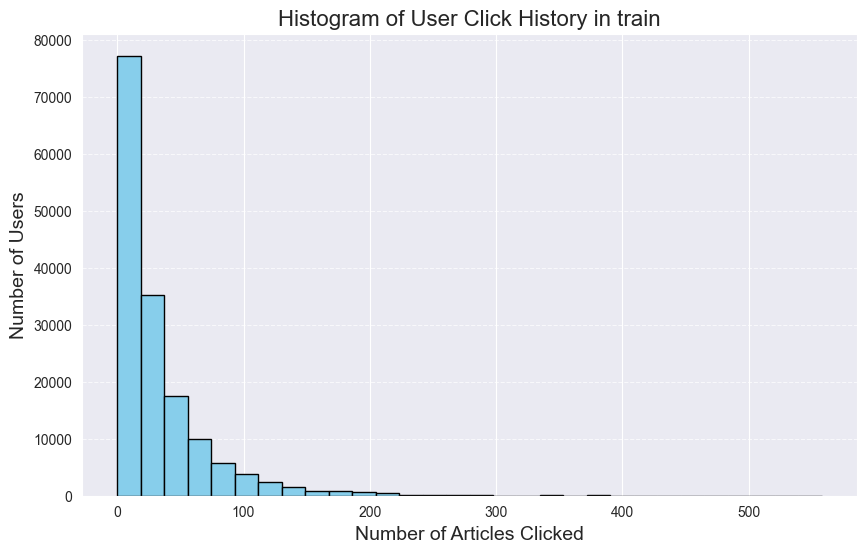

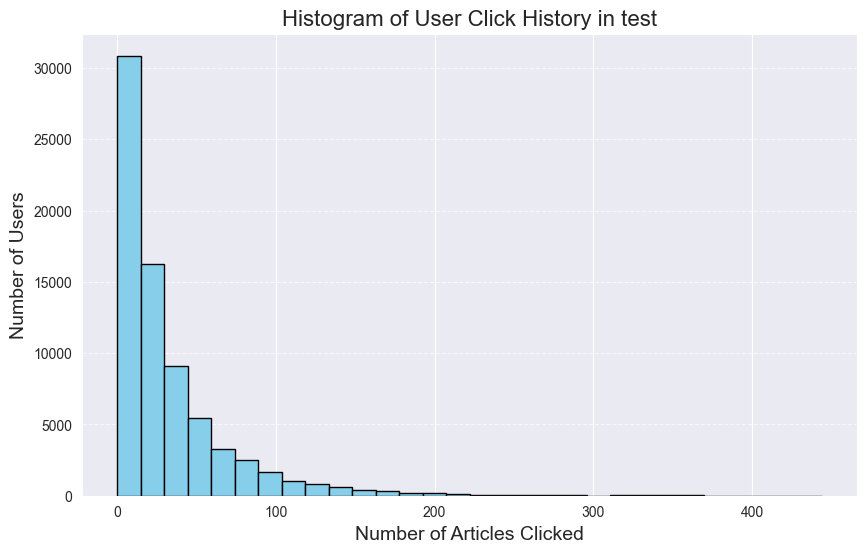

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the behaviors file
behaviors_file = '../MINDsmall_train/behaviors.tsv'
cols = ['impression_id', 'user_id', 'time', 'history', 'impressions']
behaviors_df = pd.read_csv(behaviors_file, sep='\t', header=None, names=cols)


# Load the test behaviors file
behaviors_file_test = '../MINDsmall_dev/behaviors.tsv'
cols = ['impression_id', 'user_id', 'time', 'history', 'impressions']
behaviors_df_test = pd.read_csv(behaviors_file_test, sep='\t', header=None, names=cols)




# Calculate the number of clicks per user for train 
behaviors_df['click_count'] = behaviors_df['history'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(behaviors_df['click_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of User Click History in train', fontsize=16)
plt.xlabel('Number of Articles Clicked', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate the number of clicks per user for test
behaviors_df_test['click_count'] = behaviors_df_test['history'].apply(lambda x: len(x.split()) if pd.notnull(x) else 0)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(behaviors_df_test['click_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of User Click History in test', fontsize=16)
plt.xlabel('Number of Articles Clicked', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
summary_stats_train = behaviors_df['click_count'].describe()
total_clicks_train = behaviors_df['click_count'].sum()
zero_clicks_train = (behaviors_df['click_count'] == 0).sum()

print("Train Set Click Summary")
print(summary_stats_train)
print(f"Total Clicks: {total_clicks_train}")
print(f"Users with 0 Clicks: {zero_clicks_train}")



summary_stats_test = behaviors_df_test['click_count'].describe()
total_clicks_test = behaviors_df_test['click_count'].sum()
zero_clicks_test = (behaviors_df_test['click_count'] == 0).sum()

print("Test Set Click Summary")
print(summary_stats_test)
print(f"Total Clicks: {total_clicks_test}")
print(f"Users with 0 Clicks: {zero_clicks_test}")


Train Set Click Summary
count    156965.000000
mean         32.539987
std          40.267607
min           0.000000
25%           8.000000
50%          19.000000
75%          42.000000
max         558.000000
Name: click_count, dtype: float64
Total Clicks: 5107639
Users with 0 Clicks: 3238
Test Set Click Summary
count    73152.000000
mean        32.295959
std         39.120726
min          0.000000
25%          8.000000
50%         19.000000
75%         42.000000
max        444.000000
Name: click_count, dtype: float64
Total Clicks: 2362514
Users with 0 Clicks: 2214


In [17]:
# Step 1: Get unique user IDs from train and test
train_users = set(behaviors_df['user_id'].unique())
test_users = set(behaviors_df_test['user_id'].unique())
print(len(train_users))
print(len(test_users))
# Step 2: Find intersection
common_users = train_users.intersection(test_users)

# Step 3: Count
print(f"Number of unique user_ids in both train and test: {len(common_users)}")


50000
50000
Number of unique user_ids in both train and test: 5943


In [19]:
# Total rows (impressions) in train
num_impressions_train = behaviors_df.shape[0]
print(f"Total impressions in train set: {num_impressions_train}")

# Total rows (impressions) in test
num_impressions_test = behaviors_df_test.shape[0]
print(f"Total impressions in test set: {num_impressions_test}")



# For train
user_histories_train = behaviors_df.groupby('user_id')['history'].first().dropna()
total_actual_clicks_train = user_histories_train.apply(lambda x: len(x.split())).sum()
print(f"Actual total clicks in train (unique user histories): {total_actual_clicks_train}")

# For test
user_histories_test = behaviors_df_test.groupby('user_id')['history'].first().dropna()
total_actual_clicks_test = user_histories_test.apply(lambda x: len(x.split())).sum()
print(f"Actual total clicks in test (unique user histories): {total_actual_clicks_test}")



Total impressions in train set: 156965
Total impressions in test set: 73152
Actual total clicks in train (unique user histories): 926058
Actual total clicks in test (unique user histories): 1275809
